# L3 - MPI4 Cours 3

## Les nombres de Catalan (suite)

## Mots de parenthèses et chemins de Dyck

Un *mot de parenthèses* bien formé est un mot sur l'alphabet $\{(\ ,\ )\}$ vérifiant les conditions suivantes :

- toute parenthèse ouvrante doit être refermée
- toute parenthèse fermante doit refermer une parenthèse ouverte sur sa gauche.

Les premiers mots de ce langage sont
$$\epsilon,\quad (),\quad (()),\ ()(),\quad ((())),\ (())(),\ (()()),\  ()(()),\ ()()(),\cdots$$
Ce n'est pas très lisible, il est plus commode de coder $($ par $a$ et $)$ par $b$, ce qui donne
$$\epsilon,\quad ab,\quad aabb,\ abab,\quad aaabbb,\ aabbab,\ aababb,\ abaabb,\ ababab\cdots$$
Comme on le verra plus loin, ce langage ne peut pas être reconnu par un automate fini. En fait, la machine virtuelle
qui le reconnait est très simple : elle se compose d'un compteur qui démarre à 0; on l'incrémente de 1 quand on lit un $a$, et on le décrémente de $-1$ quand on lit un $b$. Le mot est reconnu si le compteur termine à 0 sans jamais avoir été négatif.

On peut visualiser les états du compteur sur un graphique


<img src="A-Dyck-path-of-length-24.png" width="425" heigth="126">


Le $a$ code un pas montant, et le $b$ un pas descendant. Le mot est reconnu si le chemin ne croise jamais l'axe horizontal et termine dessus. Ce graphique représente donc le mot $aabaaaaabbabbbbbaaabbabb$.

Ces mots forment le *langage de Dyck*, noté $D$, et les diagrammes correspondants sont appelés *chemins de Dyck*.

La contemplation du dessin permet de trouver facilement une *grammaire* pour ce langage. On voit en effet qu'un chemin non vide doit obligatoirement commencer par un pas montant. Il peut revenir toucher l'axe horizontal puis repartir vers le haut, comme sur l'exemple. La partie qui suit le premier retour à l'axe est encore un mot du langage $D$ (éventuellement vide). La partie qui le précède commence par un $a$ et finit par un $b$, donc est de la forme $aub$, où $u$ est à son tour un mot du langage $D$. Ainsi, tout mot $w\in D$ non vide se décompose de manière unique en
$$w = aubv$$
où $u$ et $v$ sont des mots de $D$ (éventuellement vides). Sur notre exemple,
$$ w = aabaaaaabbabbbbbaaabbabb = a.abaaaaabbabbbb.b.aaabbabb.$$
Cette description de $D$ se note de manière condensée
$$D \longrightarrow \epsilon\,|\,aDbD.$$
Une telle description s'appelle une *grammaire* (non contextuelle), et se lit : "un mot de $D$, c'est soit $\epsilon$, soit $aubv$ où $u$ et $v$ sont des mots de $D$".

Cette grammaire n'est pas ambiguë : la décomposition par le premier retour à l'axe est unique. On peut donc s'en servir pour calculer $d_n=|D_n|$, le nombre de mots de $D$ de longueur $2n$ ($n$ paires de parenthèses).

Si on identifie, comme sur l'exemple du code de Fibonacci, les mots avec des monômes en variables non commutatives, et le mot vide avec le scalaire 1, la grammaire devient une *équation* vérifiée par la série
$$D = 1 +ab+ aabb+abab+ aaabbb+ aabbab+ aababb+ abaabb+ ababab\cdots$$
à savoir
$$D = 1+aDbD.$$
Si l'on remplace $a$ et $b$ par $x$, $D$ devient une série entière 
$$d(x) = 1 +x^2+2x^4+5x^6+\cdots = \sum_{n\ge 0}d_nx^{2n}$$
qui vérifie l'équation
$$d(x) = 1+xd(x)xd(x) = 1+x^2d(x)^2.$$
Ainsi, $d(x)$ est l'une des deux solutions de l'équation du second degré
$$x^2X^2-X+1=0$$
de discriminant $1-4x^2$, de sorte que
$$d(x)=\frac{1\pm\sqrt{1-4x^2}}{2x^2}$$
et comme on sait que $\sqrt{1-4x^2}=1-2x^2+O(x^4)$, pour que la solution commence par $1$, il faut encore choisir le signe moins.

On voit donc que $d(x)$ s'obtient à partir de la série qui comptait les arbres binaires
$$C(x)=\frac{1-\sqrt{1-4x}}{2} = \sum_{n\ge 0}c_nx^n$$
en remplaçant $x$ par $x^2$, puis en divisant par $x^2$.

On a donc
$$d_n = c_{n+1} =\frac{1}{n+1}{2n\choose n}=:C_n.$$
Ce sont plutôt ces nombres (commençant à $C_0=1$) qui sont appelés nombres de Catalan.


In [1]:
from sympy import *
init_printing()
var('x')

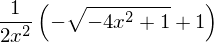

In [2]:
D = (1-sqrt(1-4*x**2))/(2*x**2); D

In [3]:
series(D,x,0,18)

### Une première bijection

Le calcul précédent soulève une question intéressante : on voit qu'il y a autant d'arbres binaires complets à $n+1$ feuilles que de mots de Dyck de longueur $2n$. Peut-on trouver une opération simple qui transforme les uns en les autres ?

Il faut déjà trouver à quoi peuvent bien correspondre les lettres sur un arbre. Un arbre binaire complet $à$ $n$ feuilles
possède $2n-1$ noeuds et $2n-2$ arêtes (*preuve* : c'est vrai pour l'arbre à 1 feuille, et pour un arbre à $n=p+q$ feuilles dont le sous-arbre gauche a $p$ feuilles et le sous-arbre droit $q$ feuilles, le nombre de sommets sera
$1+(2p-1)+(2q-1)=2(p+q)-1=2n-1$ et le nombre d'arêtes $2+(2p-2)+(2q-2)=2(p+q)-2=2n-2$).

<img src="bintree_nu.png">

Un arbre binaire complet à $n+1$ feuilles aura donc $2n$ arètes, dont $n$ arêtes gauches et $n$ arêtes droites. Les mots de Dyck qu'on veut faire correspondre à ces arbres possèdent de leur côté $n$ lettres $a$ et $n$ lettres $b$.

Il est donc tentant d'étiqueter les arêtes gauches par $a$ et les arêtes droites par $b$ :


<img src="bintree.png">

Maintenant, que sait-on faire avec un arbre ?

On sait le *parcourir* (de plusieurs manières).

Si on le parcourt en profondeur, en commençant par la gauche, on peut renvoyer l'étiquette d'une arête

- la première fois qu'on la rencontre (à l'aller) : $aaabbbbabaabb$
- la dernière fois (au retour) : $ababaaababbb $

Si on note $(A,B)$ l'arbre de sous-arbres gauche et droit $A,B$, le premier parcours est défini récursivement par
$$f(A,B) =\begin{cases}\epsilon&\text{si $(A,B)=(\emptyset,\emptyset)$}\\ af(A)bf(B)&\text{sinon}.\end{cases}$$

Si on note $L$ le langage des mots obtenus par ce procédé, on voit que sa grammaire est
$$L \longrightarrow \epsilon\,|\, aLbL$$
et donc $L=D$.

L'autre parcours conduirait à la grammaire $L\longrightarrow \epsilon\,|\, LaLb$, qui définit le même langage (on coupe selon le *dernier* retour à l'axe).

On verra en TD comment reconstruire l'arbre à partir du mot de Dyck.

## Arbres ordonnés (ou plans)

Il n'y a pas que les arbres binaires qui soient intéressants. Un arbre *ordonné* (dit aussi *arbre plan*),
c'est soit un seul noeud $\bullet$, soit

<pre>
                                o
                             /  | ...\
                            A   B    R


</pre>
où $A,B,\ldots,R$ sont des arbres ordonnés. Par exemple, les arbres ordonnés à 4 sommets sont
<img src="OrderedTrees.gif">

C'est la structure naturelle d'un système de fichiers. On peut la visualiser avec la commande `tree` :

<pre>

$ tree test
test
├── a
│   ├── 1
│   ├── 2
│   ├── 3
│   ├── e
│   └── f
│       ├── 4
│       └── 5
├── b
│   └── 6
└── c
    ├── g
    │   ├── 7
    │   └── 8
    └── h


</pre>


Notons $a_n$ le nombre d'arbres ordonnés à $n$ noeuds. On a facilement a$_0=0$, $a_1=1$, $a_2=1$, $a_3=2$, $a_4=5$.
Notons  $A(x)$ la série génératrice de cette suite :
$$A(x) = x+x^2+2x^3+5x^4+\cdots$$
On peut classer les arbres par le nombre de fils de la racine. Pour 0 fils, il n'y  qu'un arbre, qui compte pour $x$ (un seul noeud). La série des arbres dont la racine a un seul fils est $xA(x)$, celle des arbres dont la racine a deux fils
est $xA(x)^2$, *etc.*, celle des arbres dont la racine a $k$ fils est $xA(x)^k$ ...

En additionnant ces séries partielles, ont doit retrouver $A(x)$ :
$$A(x)= x +xA(x)+xA(x)^2+\cdots = x\sum_{n\ge 0}A(x)^n$$
À première vue, ça a l'air d'une équation de degré infini, mais avec quelques secondes de réflexion, on reconnait à droite une série géométrique
$$A(x)=\frac{x}{1-A(x)}$$
et en chassant le dénominateur, on retombe sur une équation du second degré
$$(1-A(x))A(x)=x \quad\Longleftrightarrow\quad A(x)^2-A(x)+x=0.$$
C'est la même que pour les arbres binaires, on a donc $a_n=c_n=C_{n-1}=\frac{1}{n}{2n-2\choose n-1}$.

### La rotation de Knuth

On peut donc de nouveau se poser la question : existe-t-il une opération simple qui transforme un arbre ordonné à $n$ noeuds en un arbre binaire à $n$ feuilles ?

La réponse est oui : c'est la *rotation de Knuth*. 
Elle construit un arbre binaire incomplet (c'est à dire, sans ses feuilles) $B=\rho(A)$ à $n-1$ noeuds. Il aura donc $n$
feuilles quand on les aura rajoutées.
Pour le calculer, on étiquette tous les noeuds de l'arbre ordonné $A$,
sauf la racine. Dans l'arbre binaire $B$, le sommet $j$ est le fils gauche de $i$ si c'est son fils le plus à gauche dans $A$, et $j$ est le fils droit de $i$ si dans $A$, c'est son frère immédiatement à droite : 
    
    
<img src="knuth_rot.png">

Pourquoi "rotation" ?

<img src="explic_rot.png">

### Les codes polonais

Le code polonais d'un arbre ordonné s'obtient en étiquetant chaque noeud par le nombre de ses fils, et en effectuant un parcours préfixe. Par exemple, pour l'arbre ci-dessus, ce serait
$$40201200010$$
Ces codes sont caractérisés par la propriété suivante : si on retranche 1 à chaque entrée et qu'on forme les sommes cumulées, elles sont toutes $\ge 0$, sauf la dernière qui vaut $-1$.
$$
\begin{matrix}
4 & 0 & 2 & 0 & 1 & 2 & 0 & 0 & 0 & 1 & 0\\
3 &-1 & 1 &-1 & 0 & 1 &-1 &-1 &-1 & 0 &-1\\
3 & 2 & 3 & 2 & 2 & 3 & 2 & 1 & 0 & 0 & -1
\end{matrix}
$$
Ils forment le [langage de Łukasiewicz](https://fr.wikipedia.org/wiki/Langage_de_%C5%81ukasiewicz).
Cette caractérisation revient à dire que si l'on remplace chaque entier $i$ par le mot $a^ib$, on obtient  un mot
$w=vb$, où $v$ est un mot de Dyck ! Sur notre exemple, on trouverait
$$aaaab.b.aab.b.ab.aab.b.b.b.ab\cdot b$$

Les sommes cumulées du tableau ci-dessus représentent la hauteur atteinte par le chemin de Dyck après chaque $b$.

On peut maintenant reconstruire un arbre binaire à partir de ce mot. Notons qu'il y a deux parcours possibles, et qu'on peut aussi lire un mot de Dyck de droite à gauche, ce qui donne 4 correspondances différentes.

Précisions le lien entre le langage de Dyck et celui de Łukasiewicz. Ce dernier a pour grammaire (notée directement sous forme de série, en représentant un code $ij\cdots k$ par le mot $x_ix_j\cdots x_k$)
$$L = x_0+x_1L+x_2L^2+x_3L^3+\cdots = x_0+\sum_{n\ge 1}x_nL^n$$
Maintenant, l'ensemble de mots $C=a^*b=\{b,ab,aab,aaab,\cdots\}$ est un code préfixe. On peut donc coder la lettre
$x_i$ par $a^ib$. 

Acec ce codage, la grammaire de $L$ devient
$$L = b + abL+a^2bL^2+a^3bL^3+\cdots = b + a(b+abL+a^2bL^2+\cdots)L = b+aLbL.$$
C'est précisément la grammaire du langage $Db$
$$Db = b +aDbDb.$$



## Quelques autres types d'arbres, de mots et de chemins

### Les nombres de Schröder

Ils comptent le nombre $s_n$ de façons de parenthéser un produit de $n$ facteurs. Plus précisément, une paire de parenthèses doit contenir au moins deux facteurs, mais elle peut en contenir plus. Cela revient à compter par *nombre de feuilles*
les arbres plans dont tout noeud interne a au moins deux fils. On a donc droit à $\bullet$ (1 feuille, pas de parenthèses), qui compte pour $x$, et la série génératrice $S(x)$ vérifie
$$S(x) = x + S(x)^2+S(x)^3+\cdots = x+\frac{S(x)^2}{1-S(x)}$$
ce qui donne encore une équation du second degré
$$2S(x)^2-(1+x)S(x)+x=0$$
de discriminant 
$$\Delta = (1+x)^2-8x = 1-6x+x^2$$
d'où (on doit encore choisir le signe moins)
$$S(x) = \frac{1+x-\sqrt{1-6x+x^2}}{4}$$

In [4]:
S = ((1+x)-sqrt(1-6*x+x**2))/4

In [5]:
series(S,x,0,10)

On ne connait pas de formule aussi simple que pour les nombres de Catalan. On pourra consulter la [fiche](https://oeis.org/A001003) correspondante sur oeis.org.

Si on calcule
$$\frac1{1-S(x)}$$
on peut constater un phénomène curieux :

In [6]:
series(1/(1-S),x,0,10)

À partir de $n=2$, le coefficient de $x^n$ est $2s_n$. C'est évidemment une conséquence de l'équation du second degré, que l'on peut récrire
$$\frac1{1-S(x)}=1-x+2S(x)$$
mais combinatoirement, si on code chaque arbre de Schröder $T$ par une lettre $a_T$, alors, 
les mots sur l'alphabet $A=\{a_T|T\text{ arbre de Schröder}\}$ représentent les *forêts de Schröder* (concaténations ordonnées d'arbres) et la série 
$\frac1{1-S(x)}$ dénombre ces forêts par nombre de feuilles. Or, il y a autant de forêts à $n$ feuilles composées
de plusieurs arbres que d'arbres à $n$ feuilles (greffer la forêt sur une racine).

Les nombres $1,2,6,22,90,\ldots$ sont les [grands nombres de Schröder](https://oeis.org/A006318).
Ils [comptent des chemins](https://fr.wikipedia.org/wiki/Nombre_de_Schr%C3%B6der) qui généralisent les chemins de Dyck (on a droit aux pas $a=(1,1)$, $b=(1,-1)$ et $c=(2,0)$ pour aller de $(0,0)$ à $(2n,0)$ sans traverser l'axe). 

### Les nombres de Motzkin

Le [nombre de Motzkin](https://fr.wikipedia.org/wiki/Nombre_de_Motzkin) 
$M_n$ compte le nombre de chemins allant de $(0,0)$ à $(n,0)$ sans traverser l'axe, avec des
pas $a=(1,1)$, $b=(1,-1)$ et $c=(1,0)$. Une grammaire du langage de Motzkin est
$$M\longrightarrow\epsilon\,|\, cM\,|\, aMbM$$
en coupant comme précédemment au premier retour à l'axe, d'où l'équation pour la série associée
$$M(x) = 1 +xM(x) +x^2M(x)^2$$
soit
$$ x^2X^2 +(x-1)X+1=0$$
Le discriminant est $\Delta=(x-1)^2-4x^2$, et (toujours pour la même raison) on doit encore choisir la solution avec le signe moins
$$M(x) = \frac{1-x-\sqrt{1-2x-3x^2}}{2x^2}.$$

In [7]:
M = (1-x-sqrt(1-2*x-3*x**2))/(2*x**2)

In [8]:
series(M,x,0,10)

On peut constater directement sur la grammaire que $M_n$ compte également le nombre d'arbres binaires-unaires par nombre total de noeuds.